# WeatherPy

In [1]:
#Dependencies
import requests
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from citipy import citipy


# Import API key
from api_keys import weather_api_key

## Generate Cities List

The aim of this code was to create as much of an even distribution of cities across the globe as possible. The cities datalist is divided into 4 quadrants taking random latitudes and longitutes from the Northern, Southern, Eastern and Western hemispheres. Lists of 150 cities from each quadrant were generated separately. This was done as 90% of the worlds population and land mass exist in the Northern hemisphere so the likelyhood of generating unique Southern hemisphere cities in a single list using the citipy library is reduced.

In [2]:
#geographical coordinates divided into 4 sections to obtain most equal spread of cities, to make the citipy library work faster the latitudes have been capped at the northern and southern most cities in the world to prevent getting too much ocean or uninhabitated land 
lats = [(0,79),(0,79), (-54,0), (-54,0)]
longs = [(0,180),(-180,0),(0,180),(-180,0)]

In [3]:
#function to make lists of unique city/country combinations from above coordinates evenly split across each section
#np.random.uniform is used to ensure selection follows uniform distribution not normal distribution
def makelists(x,listname):
    while len(listname) < 150:
        lat = np.random.uniform(lats[x][0],lats[x][1])  
        lon = np.random.uniform(longs[x][0],longs[x][1])
        city = citipy.nearest_city(lat, lon).city_name
        country = citipy.nearest_city(lat, lon).country_code
        listname.append((city, country))
        listname = list(set(listname))
    return(listname)





In [4]:
#create 4 sets of cities using makelists function, to ensure as even a spread across sections as possible
cities = {}

for i in range(4):
    name = "city" +str(i)
    listn = []
    listn = makelists(i,listn)
    cities[name] = listn
    


## Perform API Calls
This requires user to provide own API key in api_keys.py

In [14]:
#API calls on each dictionary
print("Begining of Data Retrieval\n-----------------")
cities2 = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness =[]
wind = []
country = []
date = []
i = 1
j = 1
for key,values in cities.items():
    for city in values:

        url = f"http://api.openweathermap.org/data/2.5/weather?q={city[0]},{city[1]}&units=imperial&appid={weather_api_key}"  
        data = requests.get(url).json()
   
        try:

            lat.append(data["coord"]["lat"])
            lon.append(data["coord"]["lon"])
            maxtemp.append(data["main"]["temp_max"])
            humidity.append(data["main"]["humidity"])
            cloudiness.append(data["clouds"]["all"])
            wind.append(data["wind"]["speed"])
            country.append(data["sys"]["country"])
            date.append(data["dt"])
        except: 
            message = data["message"]
            print(f"{message.capitalize()}. Skipping...")     
        else:
            print(f"Processing Record {i} of Set {j} | {city[0]}")
            cities2.append(city[0])
            #cities2 = list(set(cities2))
            i +=1
    j +=1   
print("-----------------\nData Retrieval Complete \n-----------------")
#creates dictionary of weather data    
citiesdata = {
    'City': cities2,
    'Lat': lat, 
    'Lng': lon, 
    "Max Temp" : maxtemp, 
    "Humidity" : humidity, 
    "Cloudiness" : cloudiness, 
    "Wind Speed": wind, 
    "Country": country,
    "Date" : date
}


Begining of Data Retrieval
-----------------
Processing Record 1 of Set 1 | kontagora
Processing Record 2 of Set 1 | kysyl-syr
Processing Record 3 of Set 1 | vitim
Processing Record 4 of Set 1 | dawei
Processing Record 5 of Set 1 | dalsingh sarai
Processing Record 6 of Set 1 | banda aceh
Processing Record 7 of Set 1 | nizhniy kuranakh
Processing Record 8 of Set 1 | numan
Processing Record 9 of Set 1 | srednekolymsk
Processing Record 10 of Set 1 | jinji
Processing Record 11 of Set 1 | nishihara
Processing Record 12 of Set 1 | mawlaik
City not found. Skipping...
Processing Record 13 of Set 1 | neumunster
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | zhigansk
Processing Record 16 of Set 1 | magadan
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | mehamn
Processing Record 19 of Set 1 | bardiyah
Processing Record 20 of Set 1 | mayma
Processing Record 21 of Set 1 | muroto
Processing Record 22 of Set 1 | hasaki
Processing Record 23 of Set 1 | dh

Processing Record 183 of Set 2 | teguise
Processing Record 184 of Set 2 | ucluelet
Processing Record 185 of Set 2 | braganca
Processing Record 186 of Set 2 | slave lake
Processing Record 187 of Set 2 | hornepayne
Processing Record 188 of Set 2 | sitka
Processing Record 189 of Set 2 | saint george
Processing Record 190 of Set 2 | mitu
Processing Record 191 of Set 2 | ponta do sol
Processing Record 192 of Set 2 | the valley
Processing Record 193 of Set 2 | saint-augustin
Processing Record 194 of Set 2 | lavrentiya
Processing Record 195 of Set 2 | macomb
Processing Record 196 of Set 2 | puerto ayacucho
Processing Record 197 of Set 2 | monroe
Processing Record 198 of Set 2 | puerto ayora
Processing Record 199 of Set 2 | grindavik
Processing Record 200 of Set 2 | douglas
Processing Record 201 of Set 2 | totness
Processing Record 202 of Set 2 | qaanaaq
Processing Record 203 of Set 2 | puerto escondido
Processing Record 204 of Set 2 | kahului
Processing Record 205 of Set 2 | kodiak
Processing

Processing Record 369 of Set 3 | grootfontein
Processing Record 370 of Set 3 | masuguru
Processing Record 371 of Set 3 | padang
Processing Record 372 of Set 3 | richards bay
Processing Record 373 of Set 3 | isangel
Processing Record 374 of Set 3 | ballitoville
Processing Record 375 of Set 3 | gamba
Processing Record 376 of Set 3 | khorixas
Processing Record 377 of Set 3 | hermanus
Processing Record 378 of Set 3 | poya
Processing Record 379 of Set 3 | maketu
Processing Record 380 of Set 3 | souillac
Processing Record 381 of Set 3 | port-gentil
Processing Record 382 of Set 3 | cape town
Processing Record 383 of Set 3 | northam
Processing Record 384 of Set 3 | poum
City not found. Skipping...
Processing Record 385 of Set 3 | laela
Processing Record 386 of Set 3 | tsiroanomandidy
Processing Record 387 of Set 3 | mocuba
Processing Record 388 of Set 3 | roma
Processing Record 389 of Set 3 | morondava
Processing Record 390 of Set 3 | broome
Processing Record 391 of Set 3 | auki
Processing Rec

## Converts API Data to DataFrame
   


In [15]:
#converts weather dictionary to dataframe removing duplicated city and country pairs
df1 = pd.DataFrame(citiesdata)
initial = len(df1)
df1.drop_duplicates(subset=['City','Country'], keep= 'first', inplace=True)
final = len(df1)

print(f"{initial - final} duplicate city/country pairs were removed")


9 duplicate city/country pairs were removed


In [16]:
#display data frame head
df1.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kontagora,10.3999,5.4695,82.87,56,73,5.55,NG,1618814797
1,kysyl-syr,63.8986,122.7617,21.31,77,100,8.48,RU,1618814800
2,vitim,59.4511,112.5578,32.61,71,96,6.91,RU,1618814800
3,dawei,14.0833,98.2000,87.60,60,78,7.72,MM,1618814800
4,dalsingh sarai,25.6667,85.8333,104.65,6,0,16.98,IN,1618814800


In [17]:
#calculate and display summary statistic
df1.describe().style.format({'Lat':'{:.2f}','Lng':'{:.2f}','Max Temp':'{:.2f}','Humidity':'{:.2f}','Cloudiness':'{:.2f}', 'Wind Speed':'{:.2f}' ,'Date':"{:.0f}"})


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.00,539.00,539.00,539.00,539.00,539.00,539
mean,9.56,5.85,62.32,70.85,53.01,7.61,1618814834
std,34.35,92.70,19.53,22.14,40.88,5.27,45
min,-54.80,-179.17,-0.31,6.00,0.00,0.31,1618814544
25%,-19.96,-69.71,50.20,59.00,6.00,3.84,1618814818
50%,-0.13,-1.70,67.21,76.00,61.00,6.38,1618814838
75%,40.70,85.97,75.20,87.50,97.00,10.36,1618814863
max,77.48,177.48,104.65,100.00,100.00,31.59,1618814888


 ## Inspects and removes data if humidity is over 100%

In [18]:
#cleans data if humidity is greater than 100%
if df1["Humidity"].max() > 100:
    over100 = (df1[df1["Humidity"]>100]).index
    clean_city_data = df1.drop(over100, inplace = False)
    droppedcities = df1.loc[over100]["City"]
    print(", ".join(droppedcities) + " have been removed as humidity was >100%")
else:
    clean_city_data = df1

#save to csv    
clean_city_data.to_csv("cityweatherdata.csv", encoding = "utf-8", index=False)

## Plotting Data

In [19]:
#gets date of data
date = datetime.fromtimestamp(clean_city_data["Date"].max()).strftime("%d/%m/%y")
date

'19/04/21'

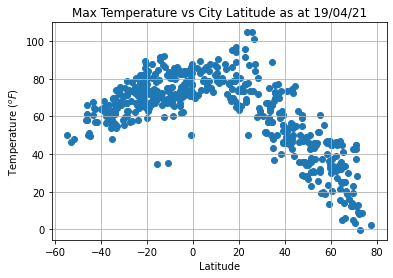

In [20]:
# Temp vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")
plt.title(f"Max Temperature vs City Latitude as at {date}")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperaturevCitiesLatitude.png")

# Show plot
plt.show()


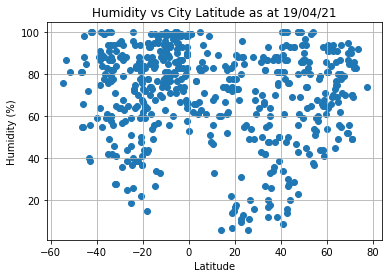

In [21]:
# Humidity vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")
plt.title(f"Humidity vs City Latitude as at {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityvCitiesLatitude.png")

# Show plot
plt.show()

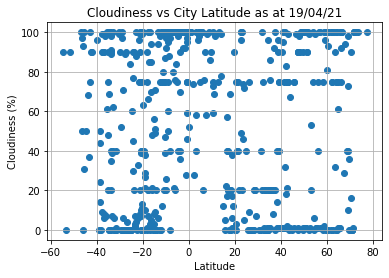

In [22]:
# Cloudiness vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")
plt.title(f"Cloudiness vs City Latitude as at {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessvCitiesLatitude.png")

# Show plot
plt.show()

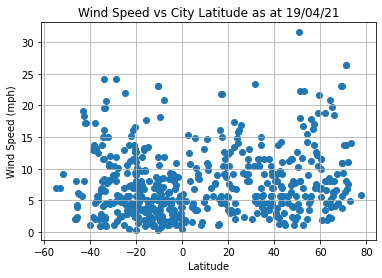

In [23]:
# Wind Speed vs Lat scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")
plt.title(f"Wind Speed vs City Latitude as at {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedvCitiesLatitude.png")

# Show plot
plt.show()

## Linear Regressions

In [24]:
#divides dataframes into northern and southern hemisphere cities
northerncities = clean_city_data[clean_city_data["Lat"] >= 0]
southerncities = clean_city_data[clean_city_data["Lat"] < 0]

In [25]:
#shows even distribution of cities in each hemisphere
print(f"Number of cities in Northern Hemisphere dataset: {len(northerncities)}\nNumber of cities in Southern Hemisphere dataset: {len(southerncities)}")

Number of cities in Northern Hemisphere dataset: 269
Number of cities in Southern Hemisphere dataset: 270


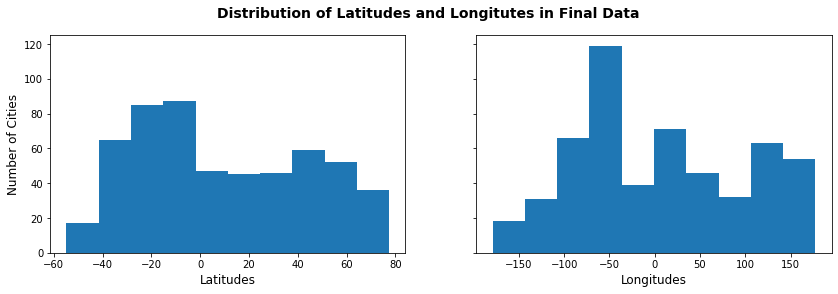

In [26]:
fig, axs = plt.subplots(1,2, sharey = True, figsize =(14,4))
fig.suptitle("Distribution of Latitudes and Longitutes in Final Data", fontsize=14, fontweight="bold")
axs[0].hist(clean_city_data['Lat'])
axs[0].set_xlabel("Latitudes",fontsize=12)
axs[0].set_ylabel("Number of Cities",fontsize=12)
axs[1].hist(clean_city_data['Lng'])
axs[1].set_xlabel("Longitudes",fontsize=12)

plt.show()


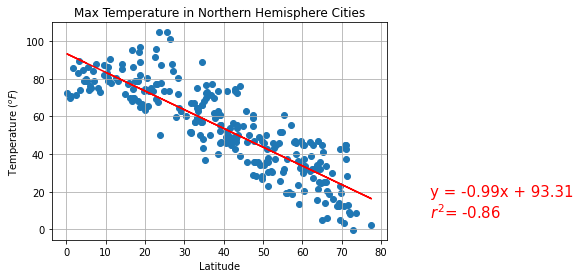

In [27]:
# Linear regression for Northern Hemisphere cities temperature vs latitude
northlat = northerncities['Lat']
northtemp = northerncities['Max Temp']
(ntslope, ntintercept, ntrvalue, ntpvalue, ntstderr) = stats.linregress(northlat, northtemp)
northtempregress = northlat * ntslope + ntintercept
ntline = f"y = {ntslope:.2f}x + {ntintercept:.2f}\n$r^{2}$= {ntrvalue:.2f}" 
plt.scatter(northlat,northtemp)
plt.plot(northlat,northtempregress,"r-")
plt.figtext(1,0.2,ntline,fontsize=15,color="red")
plt.title("Max Temperature in Northern Hemisphere Cities")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthTempvLatRegression.png")
#show plot
plt.show()

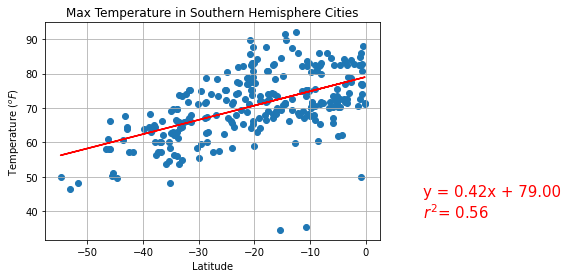

In [28]:
# Linear regression for Southern Hemisphere cities temperature vs latitude
southlat = southerncities['Lat']
southtemp = southerncities['Max Temp']
(stslope, stintercept, strvalue, stpvalue, ststderr) = stats.linregress(southlat, southtemp)
southtempregress = southlat * stslope + stintercept
stline = f"y = {stslope:.2f}x + {stintercept:.2f}\n$r^{2}$= {strvalue:.2f}" 
plt.scatter(southlat,southtemp)
plt.plot(southlat,southtempregress,"r-")
plt.figtext(1,0.2,stline,fontsize=15,color="red")
plt.title("Max Temperature in Southern Hemisphere Cities")
plt.ylabel("Temperature ($^oF$)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthTempvLatRegression.png")
#show plot
plt.show()

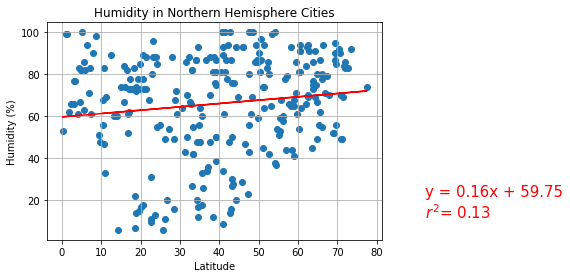

In [29]:
# Linear regression for Northern Hemisphere cities humidity vs latitude
northlat = northerncities['Lat']
northhum = northerncities['Humidity']
(nhslope, nhintercept, nhrvalue, nhpvalue, nhstderr) = stats.linregress(northlat, northhum)
northhumregress = northlat * nhslope + nhintercept
nhline = f"y = {nhslope:.2f}x + {nhintercept:.2f}\n$r^{2}$= {nhrvalue:.2f}" 
plt.scatter(northlat,northhum)
plt.plot(northlat,northhumregress,"r-")
plt.figtext(1,0.2,nhline,fontsize=15,color="red")
plt.title("Humidity in Northern Hemisphere Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthHumidvLatRegression.png")
#show plot
plt.show()

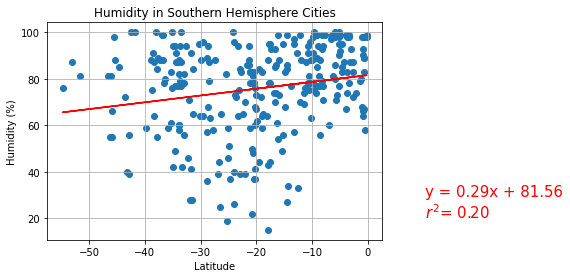

In [30]:
# Linear regression for Southern Hemisphere cities humidity vs latitude
southlat = southerncities['Lat']
southhum = southerncities['Humidity']
(shslope, shintercept, shrvalue, shpvalue, shstderr) = stats.linregress(southlat, southhum)
sorthhumregress = southlat * shslope + shintercept
shline = f"y = {shslope:.2f}x + {shintercept:.2f}\n$r^{2}$= {shrvalue:.2f}" 
plt.scatter(southlat,southhum)
plt.plot(southlat,sorthhumregress,"r-")
plt.figtext(1,0.2,shline,fontsize=15,color="red")
plt.title("Humidity in Southern Hemisphere Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthHumidvLatRegression.png")
#show plot
plt.show()

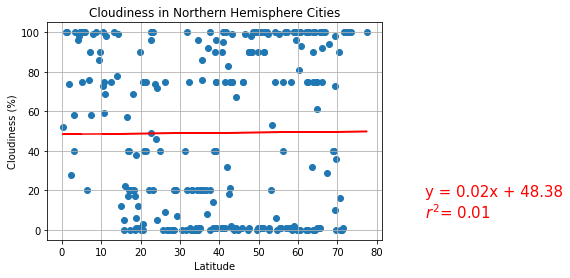

In [31]:
# Linear regression for Northern Hemisphere cities cloudiness vs latitude
northlat = northerncities['Lat']
northcloud = northerncities['Cloudiness']
(ncslope, ncintercept, ncrvalue, ncpvalue, ncstderr) = stats.linregress(northlat, northcloud)
northcloudregress = northlat * ncslope + ncintercept
ncline = f"y = {ncslope:.2f}x + {ncintercept:.2f}\n$r^{2}$= {ncrvalue:.2f}" 
plt.scatter(northlat,northcloud)
plt.plot(northlat,northcloudregress,"r-")
plt.figtext(1,0.2,ncline,fontsize=15,color="red")
plt.title("Cloudiness in Northern Hemisphere Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthCloudvLatRegression.png")
#show plot
plt.show()

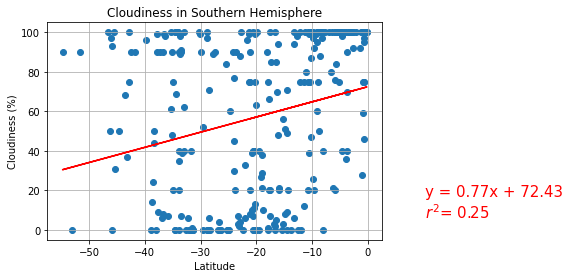

In [32]:
# Linear regression for Southern Hemisphere cities cloudiness vs latitude
southlat = southerncities['Lat']
southcloud = southerncities['Cloudiness']
(scslope, scintercept, scrvalue, scpvalue, scstderr) = stats.linregress(southlat, southcloud)
sorthcloudregress = southlat * scslope + scintercept
scline = f"y = {scslope:.2f}x + {scintercept:.2f}\n$r^{2}$= {scrvalue:.2f}" 
plt.scatter(southlat,southcloud)
plt.plot(southlat,sorthcloudregress,"r-")
plt.figtext(1,0.2,scline,fontsize=15,color="red")
plt.title("Cloudiness in Southern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthCloudvLatRegression.png")
#show plot
plt.show()

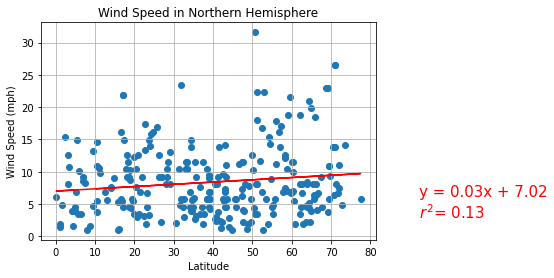

In [33]:
# Linear regression for Northern Hemisphere cities wind speed vs latitude
northlat = northerncities['Lat']
northwind = northerncities['Wind Speed']
(nwslope, nwintercept, nwrvalue, nwpvalue, nwstderr) = stats.linregress(northlat, northwind)
northwindregress = northlat * nwslope + nwintercept
nwline = f"y = {nwslope:.2f}x + {nwintercept:.2f}\n$r^{2}$= {nwrvalue:.2f}" 
plt.scatter(northlat,northwind)
plt.plot(northlat,northwindregress,"r-")
plt.figtext(1,0.2,nwline,fontsize=15,color="red")
plt.title("Wind Speed in Northern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("NorthWindvLatRegression.png")
#show plot
plt.show()

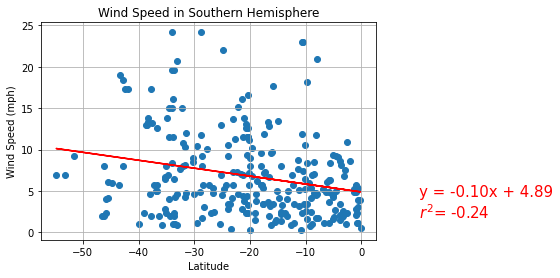

In [34]:
# Linear regression for Southern Hemisphere cities wind speed vs latitude
southlat = southerncities['Lat']
southwind = southerncities['Wind Speed']
(swslope, swintercept, swrvalue, swpvalue, swstderr) = stats.linregress(southlat, southwind)
sorthwindregress = southlat * swslope + swintercept
swline = f"y = {swslope:.2f}x + {swintercept:.2f}\n$r^{2}$= {swrvalue:.2f}" 
plt.scatter(southlat,southwind)
plt.plot(southlat,sorthwindregress,"r-")
plt.figtext(1,0.2,swline,fontsize=15,color="red")
plt.title("Wind Speed in Southern Hemisphere")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("SouthWindvLatRegression.png")
#show plot
plt.show()